# Analysis of Body Cues for ASC Children in Mixed Reality Full-Body Interaction System


## Data import 

In [1]:
import itertools
import matplotlib as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd 
import numpy as np
import re 
import csv
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

In [2]:
p1 = pd.read_csv('SOCIAL_INITIATION_ASC_LOF_FORPYTHON.csv')


with open('SOCIAL_INITIATION_ASC_LOF_FORPYTHON.csv',newline='') as csvfile:
    p1_data = list(csv.reader(csvfile))
p1_data_head = np.array(p1_data[0])
p1_data_data = np.array(p1_data[1:])

print('SOCIAL_INITIATION_ASC_LOF_FORPYTHON HEADER')
for i,n in enumerate(p1_data_head): print(i,n)
    
print ("dataset successfully loaded!")

SOCIAL_INITIATION_ASC_LOF_FORPYTHON HEADER
0 social_interaction
1 p1_knee_hip
2 p1_nose_hip
3 p1_r_hand_l_hand
4 p1_nose_hand
5 p1_nose_elbow
6 p1_neck_hand
7 p1_foot_nose
8 max_hand_x
9 right_f1_arccos_x
10 right_f2_arccos_x
11 right_f3_arccos_x
12 left_f1_arccos_x
13 left_f2_arccos_x
14 left_f3_arccos_x
15 upper_joints_velocity_x
16 sum _of_log-energy_x
17 auto_cor_x
18 p1_knee_hip.1
19 p1_nose_hip.1
20 p1_r_hand_l_hand.1
21 p1_nose_hand.1
22 p1_nose_elbow.1
23 p1_neck_hand.1
24 p1_foot_nose.1
25 max_hand.1_x
26 right_f1_arccos.1_x
27 right_f2_arccos.1_x
28 right_f3_arccos.1_x
29 left_f1_arccos.1_x
30 left_f2_arccos.1_x
31 left_f3_arccos.1_x
32 upper_joints_velocity.1_x
33 sum _of_log-energy.1_x
34 auto_cor.1_x
35 p1_knee_hip.2
36 p1_nose_hip.2
37 p1_r_hand_l_hand.2
38 p1_nose_hand.2
39 p1_nose_elbow.2
40 p1_neck_hand.2
41 p1_foot_nose.2
42 max_hand.2_x
43 right_f1_arccos.2_x
44 right_f2_arccos.2_x
45 right_f3_arccos.2_x
46 left_f1_arccos.2_x
47 left_f2_arccos.2_x
48 left_f3_arccos.2

In [3]:
# dimensions of the datasets
print(p1.shape)

(279, 354)


## Data preparation visualization and exploration

**Check the frequency of differient behaviors**

In [4]:
print (p1["social_interaction"].value_counts()) 

1    117
3    107
2     55
Name: social_interaction, dtype: int64


#### Data formatting and data preparation

In [5]:
p1_y = p1_data_data[:,0]
p1_x = p1_data_data[:,1:]
p1_y = p1_y.astype(np.float) # convert array to strings to array of floats
p1_x = p1_x.astype(np.float) # convert array to strings to array of floats

# Normalize data, some methods are sensitive to high scale differiences between features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
p1_x = scaler.fit_transform(p1_x)

# Sample a training set hold out 50% of the data while for test 50% of the data
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p1_x, p1_y, test_size=0.5, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((139, 353), (139,), (140, 353), (140,))

## Feature selection

We have 51 features which is too much may cause overfitting, so we select the 10 most relevant features with SelectKBest (based on f_classif score function by default). It selects features according to the k highest scores. And will compare the result using the selected features, with the result using all features.

In [8]:
from sklearn.feature_selection import SelectKBest,RFECV
features = SelectKBest(k=10).fit(X_train, y_train).get_support()

In [9]:
print ('Features selected by using SelectKBest:')
for (i,j) in zip(p1_data_head[1:], features):
    if j: print('-', i)

Features selected by using SelectKBest:
- p1_nose_hip
- p1_nose_hand
- p1_nose_elbow
- p1_foot_nose
- p1_nose_hip.2
- p2_nose_hand
- p2_nose_elbow
- p2_foot_nose
- p2_nose_hand.2
- max_hand.2_y


## Support Vector Machine - Classification

### SVM Linear Kernel

In [8]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# SVM with linear kernel
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
scores = cross_val_score(clf,X_train, y_train, cv=5)
print ("Score for each run of the cross validation: ", scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(), scores.std()*2))
score = clf.score(X_test, y_test)
print("Mean accuracy on the test data and labels:",score)

Score for each run of the cross validation:  [0.53571429 0.5        0.42857143 0.60714286 0.55555556]
>> Accuracy: 0.53 (+/- 0.12)
Mean accuracy on the test data and labels: 0.55


SVM Linear Kernel
[[41  8 16]
 [10  4 10]
 [11  8 32]]


AttributeError: module 'matplotlib' has no attribute 'show'

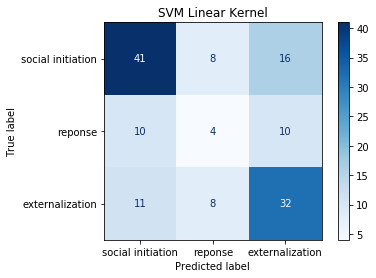

In [8]:
# Plot non-normalized confusion matrix
titles_options = [("SVM Linear Kernel", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

### SVM polynomial kernel, degree 2,3,4 and 5

In [16]:
for i in [2, 3, 4, 5]:
  clf = svm.SVC(kernel='poly',degree=i).fit(X_train, y_train)
  yhat = clf.predict(X_test)

  print("\nPolynomial kernel, degree = ", i)
  scores = cross_val_score(clf, X_train, y_train, cv=5)
  print("Score for each run of the cross validation: ", scores)
  # The mean score and the 95% confidence interval of the score estimate are hence given by:
  print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  score = clf.score(X_test, y_test)
  print("Mean accuracy on the test data and labels: ", score)


Polynomial kernel, degree =  2
Score for each run of the cross validation:  [0.5        0.53571429 0.42857143 0.53571429 0.59259259]
>> Accuracy: 0.52 (+/- 0.11)
Mean accuracy on the test data and labels:  0.5142857142857142

Polynomial kernel, degree =  3
Score for each run of the cross validation:  [0.46428571 0.53571429 0.39285714 0.5        0.62962963]
>> Accuracy: 0.50 (+/- 0.16)
Mean accuracy on the test data and labels:  0.4714285714285714

Polynomial kernel, degree =  4
Score for each run of the cross validation:  [0.42857143 0.57142857 0.35714286 0.5        0.59259259]
>> Accuracy: 0.49 (+/- 0.18)
Mean accuracy on the test data and labels:  0.4714285714285714

Polynomial kernel, degree =  5
Score for each run of the cross validation:  [0.46428571 0.5        0.35714286 0.46428571 0.66666667]
>> Accuracy: 0.49 (+/- 0.20)
Mean accuracy on the test data and labels:  0.45714285714285713


SVM polynomial kernel
[[42  8 15]
 [11  3 10]
 [20  4 27]]


AttributeError: module 'matplotlib' has no attribute 'show'

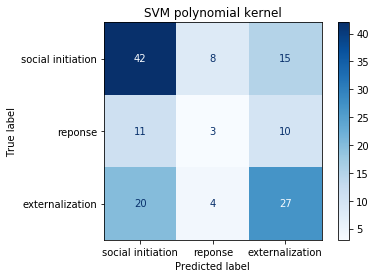

In [17]:
# Plot non-normalized confusion matrix
titles_options = [("SVM polynomial kernel", None),
                  ("Normalized confusion matrix", 'true')]
clf = svm.SVC(kernel='poly',degree=2).fit(X_train, y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

### SVM with RBF kernel

In [18]:
clf = svm.SVC(kernel='rbf').fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = clf.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Score for each run of the cross validation:  [0.42857143 0.57142857 0.46428571 0.39285714 0.59259259]
>> Accuracy: 0.49 (+/- 0.16)
Mean accuracy on the test data and labels:  0.5142857142857142


SVM RBF kernel
[[42  8 15]
 [11  3 10]
 [20  4 27]]


AttributeError: module 'matplotlib' has no attribute 'show'

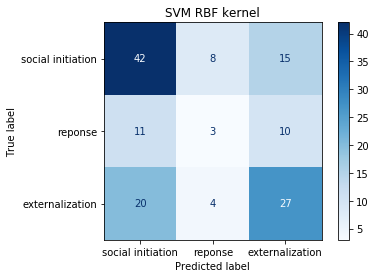

In [19]:
# Plot non-normalized confusion matrix
titles_options = [("SVM RBF kernel", None),
                  ("Normalized confusion matrix", 'true')]
clf = svm.SVC(kernel='poly',degree=2).fit(X_train, y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

### SVM with sigmoid kernel

In [20]:
clf = svm.SVC(kernel='sigmoid', C=1).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = clf.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Score for each run of the cross validation:  [0.42857143 0.39285714 0.39285714 0.39285714 0.40740741]
>> Accuracy: 0.40 (+/- 0.03)
Mean accuracy on the test data and labels:  0.36428571428571427


## MLP

### MLP with adam solver

In [21]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(100,),
                           max_iter=10000,
                           activation = 'tanh',
                           solver='adam',
                           random_state=1)
#https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/
#Fitting the training data to the network
classifier.fit(X_train, y_train)

print("Accuracy of MLPClassifier : ", classifier.score(X_test, y_test))

Accuracy of MLPClassifier :  0.5142857142857142


In [22]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = classifier.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Score for each run of the cross validation:  [0.60714286 0.64285714 0.42857143 0.5        0.55555556]
>> Accuracy: 0.55 (+/- 0.15)
Mean accuracy on the test data and labels:  0.5142857142857142


MLP adam solver
[[40 11 14]
 [12  5  7]
 [15  9 27]]


AttributeError: module 'matplotlib' has no attribute 'show'

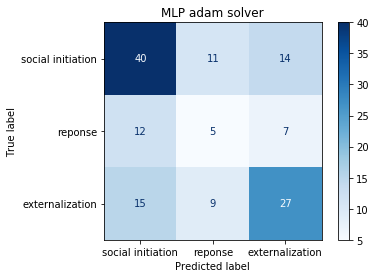

In [23]:
# Plot non-normalized confusion matrix
titles_options = [("MLP adam solver", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

### MLP with sgd solver

In [24]:
classifier = MLPClassifier(max_iter=10000,
                           activation = 'relu',
                           solver='sgd',
                           learning_rate='adaptive',
                           random_state=1)
classifier.fit(X_train, y_train)
print("Accuracy of MLPClassifier : ", classifier.score(X_test, y_test))
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = classifier.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Accuracy of MLPClassifier :  0.5357142857142857
Score for each run of the cross validation:  [0.5        0.57142857 0.53571429 0.5        0.59259259]
>> Accuracy: 0.54 (+/- 0.07)
Mean accuracy on the test data and labels:  0.5357142857142857


MLP sgd solver
[[45  7 13]
 [11  5  8]
 [16 10 25]]


AttributeError: module 'matplotlib' has no attribute 'show'

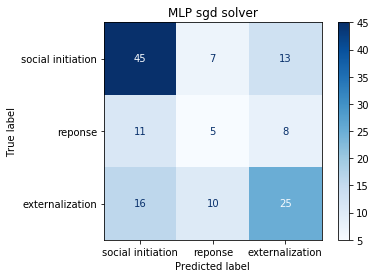

In [25]:
# Plot non-normalized confusion matrix
titles_options = [("MLP sgd solver", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

## K Nearest Neighbor 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k = 10 # number of neighbors

classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train,y_train)
print("Accuracy of MLPClassifier : ", classifier.score(X_test, y_test))
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = classifier.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Accuracy of MLPClassifier :  0.45714285714285713
Score for each run of the cross validation:  [0.5        0.46428571 0.32142857 0.39285714 0.62962963]
>> Accuracy: 0.46 (+/- 0.21)
Mean accuracy on the test data and labels:  0.45714285714285713


#### Finding the best K for KNN

In [27]:
Ks = 10
jac = np.zeros(Ks)
f1 = np.zeros(Ks)
mcv = np.zeros(Ks)
mt = np.zeros(Ks)

for n in range(Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n+1)
    kNN_model.fit(X_train,y_train)
    scores = cross_val_score(kNN_model, X_train, y_train, cv=5)
    mcv[n] = scores.mean()
    score = kNN_model.score(X_test, y_test)
    mt[n] = score
    
print("Mean accuracy on test data reaches the highest value for", int(np.where(mt == max(mt))[0])+1, "neighbors")
print("Mean accuracy on cv reaches the highest value for", int(np.where(mcv == max(mcv))[0])+1, "neighbors")

Mean accuracy on test data reaches the highest value for 4 neighbors
Mean accuracy on cv reaches the highest value for 10 neighbors


## Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)

scores = cross_val_score(DT_model, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = DT_model.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Score for each run of the cross validation:  [0.42857143 0.42857143 0.46428571 0.32142857 0.44444444]
>> Accuracy: 0.42 (+/- 0.10)
Mean accuracy on the test data and labels:  0.42857142857142855


## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)

scores = cross_val_score(LR_model, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = LR_model.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

Score for each run of the cross validation:  [0.5        0.64285714 0.46428571 0.60714286 0.62962963]
>> Accuracy: 0.57 (+/- 0.15)
Mean accuracy on the test data and labels:  0.5357142857142857


LR
[[44  7 14]
 [10  3 11]
 [16  7 28]]


AttributeError: module 'matplotlib' has no attribute 'show'

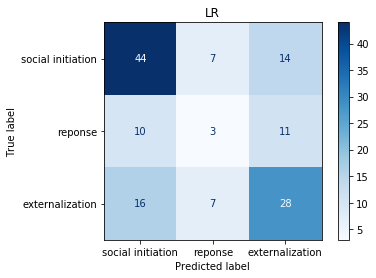

In [32]:
# Plot non-normalized confusion matrix
titles_options = [("LR", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR_model, X_test, y_test,
                                 display_labels=['social initiation','reponse','externalization'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    plt.show()

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Score for each run of the cross validation: ", scores)

# The mean score and the 95% confidence interval of the score estimate are hence given by:
print(">> Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
score = clf.score(X_test, y_test)
print("Mean accuracy on the test data and labels: ", score)

Score for each run of the cross validation:  [0.46428571 0.53571429 0.42857143 0.35714286 0.51851852]
>> Accuracy: 0.46 (+/- 0.13)
Mean accuracy on the test data and labels:  0.4642857142857143
